In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Análise descritiva dos dados (EDA)

### a. Extrair variaveis e apresentar os *insights*

In [2]:
df = pd.read_json('receitas.json')

In [3]:
# verificar o shape 
df.shape

(20130, 11)

In [4]:
df.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [5]:
df.dtypes

directions                  object
fat                        float64
date           datetime64[ns, UTC]
categories                  object
calories                   float64
desc                        object
protein                    float64
rating                     float64
title                       object
ingredients                 object
sodium                     float64
dtype: object

In [6]:
#Removendo espaços finais
for col in df.select_dtypes("object").columns:
    df[col] = df[col].apply(lambda x: x.strip() if type(x) == str else x)

In [7]:
df.sort_values(by='calories', ascending=False)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
11444,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0
6400,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0
19749,[Position rack in center of oven and preheat t...,747374.0,2004-08-20 04:00:00+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Thanksgivin...",13062948.0,None,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","[1 cup (packed) golden brown sugar, 2 large eg...",12005810.0
2985,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0
1308,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0
...,...,...,...,...,...,...,...,...,...,...,...
20090,[In a large saucepan of boiling salted water c...,NaN,2004-08-20 04:00:00+00:00,"[Pasta, Sauté, Quick & Easy, Parmesan, Sausage...",NaN,Can be prepared in 45 minutes or less.,NaN,3.750,Pepperoni Spaghetti Cakes,"[1/4 pound spaghetti, 1/3 cup finely chopped s...",NaN
20094,[Swirl poire Williams in 2 glasses to coat; di...,NaN,2007-07-26 17:34:23+00:00,"[Fruit Juice, Liqueur, Alcoholic, Ginger, Bran...",NaN,Serve additional pear crisps as snacks.,NaN,3.125,Autumn Pear Chip,"[Poire Williams (clear pear brandy), 6 quarter...",NaN
20104,[Heat 1 tablespoon oil in a large heavy pot ov...,NaN,2012-09-18 04:00:00+00:00,"[Egg, Leafy Green, Vegetable, Brunch, Vegetari...",NaN,We love the frilly edges of olive oil-fried eg...,NaN,5.000,Spinach with Chickpeas and Fried Eggs,"[3 tablespoons olive oil, divided, plus more, ...",NaN
20113,[Preheat oven to 400°F. Spray 2 large baking s...,NaN,2004-08-20 04:00:00+00:00,"[Sandwich, Herb, Vegetable, Roast, Picnic, Veg...",NaN,None,NaN,3.750,Herbed Goat Cheese and Roasted-Vegetable Sandw...,"[Nonstick vegetable oil spray, 2 medium zucchi...",NaN


In [8]:
df["directions_string"] = df["directions"].astype(str)
df["categories_string"] = df["categories"].astype(str)
df["ingredients_string"] = df["ingredients"].astype(str)

all_columns = list(df.columns.copy())

In [9]:
all_columns.remove("categories")
all_columns.remove("directions")
all_columns.remove("ingredients")

In [10]:
df = df.drop_duplicates(subset=all_columns)

In [11]:
df.sort_values(by='calories', ascending=False)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
11444,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0,['Stir together all ingredients except pastry ...,"['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', '...","['2 firm-ripe Anjou pears, peeled, cored, and ..."
6400,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0,['Put a large baking sheet on oven rack in mid...,"['Egg', 'Fruit', 'Bake', 'Blueberry', 'Summer'...","['1 1/4 cups packed light brown sugar', '5 tab..."
19749,[Position rack in center of oven and preheat t...,747374.0,2004-08-20 04:00:00+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Thanksgivin...",13062948.0,None,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","[1 cup (packed) golden brown sugar, 2 large eg...",12005810.0,['Position rack in center of oven and preheat ...,"['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', '...","['1 cup (packed) golden brown sugar', '2 large..."
2985,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0,"['Soak bread in water to cover 30 minutes, the...","['Food Processor', 'Backyard BBQ', 'Ground Lam...","['3 slices firm white sandwich bread, torn int..."
1308,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0,['Wash rice in several changes of cold water i...,"['Lamb', 'Rice', 'Vegetable', 'Braise', 'Dinne...","['3 cups basmati rice (7 ounces)', '1 medium o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20076,[Sliced roasted red peppers from jar Mix peper...,NaN,2010-05-12 04:00:00+00:00,"[Cheese, Onion, Quick & Easy, Backyard BBQ, Lu...",NaN,None,NaN,5.000,Muffuletta Hot Dogs,"[1 cup sliced peperoncini with 1 cup brine, 1 ...",NaN,['Sliced roasted red peppers from jar Mix pepe...,"['Cheese', 'Onion', 'Quick & Easy', 'Backyard ...","['1 cup sliced peperoncini with 1 cup brine', ..."
20090,[In a large saucepan of boiling salted water c...,NaN,2004-08-20 04:00:00+00:00,"[Pasta, Sauté, Quick & Easy, Parmesan, Sausage...",NaN,Can be prepared in 45 minutes or less.,NaN,3.750,Pepperoni Spaghetti Cakes,"[1/4 pound spaghetti, 1/3 cup finely chopped s...",NaN,['In a large saucepan of boiling salted water ...,"['Pasta', 'Sauté', 'Quick & Easy', 'Parmesan',...","['1/4 pound spaghetti', '1/3 cup finely choppe..."
20094,[Swirl poire Williams in 2 glasses to coat; di...,NaN,2007-07-26 17:34:23+00:00,"[Fruit Juice, Liqueur, Alcoholic, Ginger, Bran...",NaN,Serve additional pear crisps as snacks.,NaN,3.125,Autumn Pear Chip,"[Poire Williams (clear pear brandy), 6 quarter...",NaN,['Swirl poire Williams in 2 glasses to coat; d...,"['Fruit Juice', 'Liqueur', 'Alcoholic', 'Ginge...","['Poire Williams (clear pear brandy)', '6 quar..."
20104,[Heat 1 tablespoon oil in a large heavy pot ov...,NaN,2012-09-18 04:00:00+00:00,"[Egg, Leafy Green, Vegetable, Brunch, Vegetari...",NaN,We love the frilly edges of olive oil-fried eg...,NaN,5.000,Spinach with Chickpeas and Fried Eggs,"[3 tablespoons

In [12]:
df.shape

(18296, 14)

In [13]:
df.describe()

,fat,calories,protein,rating,sodium
count,1.447900e+04,1.453200e+04,14499.000000,18285.000000,1.453100e+04
mean,3.627313e+02,6.609487e+03,92.074281,3.713187,6.561556e+03
std,2.133631e+04,3.743950e+05,3508.244063,1.335423,3.480575e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,8.000000e+00,2.050000e+02,3.000000,3.750000,8.800000e+01
50%,1.800000e+01,3.450000e+02,9.000000,4.375000,3.040000e+02
75%,3.400000e+01,5.990000e+02,28.000000,4.375000,7.320000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


In [14]:
df.isnull().sum()

directions               1
fat                   3817
date                     1
categories               1
calories              3764
desc                  6082
protein               3797
rating                  11
title                    1
ingredients              1
sodium                3765
directions_string        0
categories_string        0
ingredients_string       0
dtype: int64

Existem bastante dados nulos, para seguir com a analise será necessario excluir esses dados

In [15]:
df_new = df.dropna()

In [16]:
df_new.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0,['Combine first 9 ingredients in heavy medium ...,"['Food Processor', 'Onion', 'Pork', 'Bake', 'B...","['1 1/2 cups whipping cream', '2 medium onions..."
5,"[Mix basil, mayonnaise and butter in processor...",79.0,2004-08-20 04:00:00+00:00,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",948.0,This recipe can be prepared in 45 minutes or l...,19.0,4.375,The Best Blts,[2 1/2 cups (lightly packed) fresh basil leave...,1042.0,"['Mix basil, mayonnaise and butter in processo...","['Sandwich', 'Food Processor', 'Tomato', 'Kid-...",['2 1/2 cups (lightly packed) fresh basil leav...
8,"[Stir together soy sauce, sugar, sesame oil, w...",10.0,2004-08-20 04:00:00+00:00,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",170.0,Bulgogi,7.0,4.375,Korean Marinated Beef,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",1272.0,"['Stir together soy sauce, sugar, sesame oil, ...","['Beef', 'Ginger', 'Sauté', 'Stir-Fry', 'Quick...","['1/4 cup soy sauce', '1 tablespoon sugar', '2..."
9,[Chop enough parsley leaves to measure 1 table...,41.0,2008-10-23 22:24:26+00:00,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...",602.0,Transform your picnic into un pique-nique to r...,23.0,3.750,Ham Persillade with Mustard Potato Salad and M...,"[6 long parsley sprigs, divided, 1 3/4 cups re...",1696.0,['Chop enough parsley leaves to measure 1 tabl...,"['Salad', 'Mustard', 'Potato', 'Picnic', 'Lunc...","['6 long parsley sprigs, divided', '1 3/4 cups..."
10,[Heat oil in heavy large skillet over medium-h...,5.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Dairy, Side, Thanksgiving, Rosema...",256.0,Simmering the yams fills them with flavor and ...,4.0,3.750,"Yams Braised with Cream, Rosemary and Nutmeg","[4 teaspoons olive oil, 1/2 cup finely chopped...",30.0,['Heat oil in heavy large skillet over medium-...,"['Milk/Cream', 'Dairy', 'Side', 'Thanksgiving'...","['4 teaspoons olive oil', '1/2 cup finely chop..."


In [17]:
df_new.shape

(9594, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calories'>

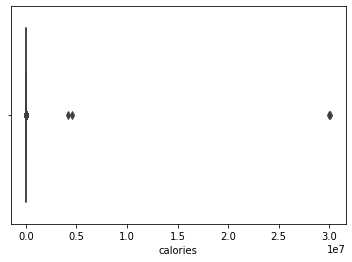

In [18]:
sns.boxplot(df_new["calories"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='calories', ylabel='Density'>

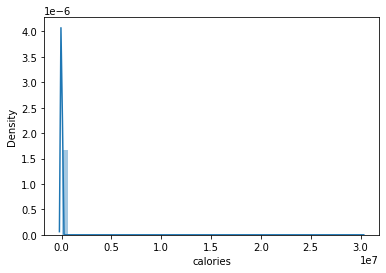

In [20]:
sns.distplot(df_new["calories"])

Os graficos acima nos mostram que temos uma concentração muito grande na parte inferior, e que possuimos alguns ouliers nos dados.

In [22]:
#Distribuição da coluna de calorias
print("A média das calorias é: " ,df_new["calories"].mean())
print("A mediana das calorias é: " , df_new["calories"].median())
print("O Q3 das calorias é: " , df_new["calories"].quantile(0.75))
print("O Q1 das calorias é: " , df_new["calories"].quantile(0.25))

A média das calorias é:  7707.206066291432
A mediana das calorias é:  367.0
O Q3 das calorias é:  627.0
O Q1 das calorias é:  214.0


A média está muito alta e muito distante da mediana, possivelmente por conta dos valores muito altos que encontramos na base

In [25]:
#Cálculo para encontrar os outliers
IQR = df_new["calories"].quantile(0.75) - df_new["calories"].quantile(0.25) #distância interquartílica = Q3-Q1
calc =  1190.0 #(1,5 * IQR)
Q3 = df_new["calories"].quantile(0.75)
Q1 = df_new["calories"].quantile(0.25)
Lsuperior = Q3 + calc
Linferior = Q1 - calc

In [26]:
#Exibindo o limite superior e inferior
print("O limite superior é: ", Lsuperior)
print("O limite inferior é: ", Linferior)

O limite superior é:  1817.0
O limite inferior é:  -976.0


In [27]:
df_new.sort_values(by="calories", ascending=False)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
11444,[Stir together all ingredients except pastry d...,1722763.0,2006-10-20 15:17:12+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Christmas, ...",30111218.0,Don't be nervous about making meatless minceme...,200968.0,4.375,Pear-Cranberry Mincemeat Lattice Pie,"[2 firm-ripe Anjou pears, peeled, cored, and f...",27675110.0,['Stir together all ingredients except pastry ...,"['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', '...","['2 firm-ripe Anjou pears, peeled, cored, and ..."
6400,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0,['Put a large baking sheet on oven rack in mid...,"['Egg', 'Fruit', 'Bake', 'Blueberry', 'Summer'...","['1 1/4 cups packed light brown sugar', '5 tab..."
2985,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0,"['Soak bread in water to cover 30 minutes, the...","['Food Processor', 'Backyard BBQ', 'Ground Lam...","['3 slices firm white sandwich bread, torn int..."
1308,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0,['Wash rice in several changes of cold water i...,"['Lamb', 'Rice', 'Vegetable', 'Braise', 'Dinne...","['3 cups basmati rice (7 ounces)', '1 medium o..."
16276,[Toast fennel seeds in a small heavy skillet o...,595.0,2008-02-07 15:44:51+00:00,"[Lamb, Quick & Easy, Raisin, Ground Lamb, Pan-...",54512.0,"Merguez, the spicy lamb sausages of North Afri...",2074.0,4.375,Merguez Lamb Patties with Golden Raisin Couscous,"[1 1/4 teaspoons fennel seeds, 1 1/4 pounds gr...",3983.0,['Toast fennel seeds in a small heavy skillet ...,"['Lamb', 'Quick & Easy', 'Raisin', 'Ground Lam...","['1 1/4 teaspoons fennel seeds', '1 1/4 pounds..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,"[Cut the garlic cloves in half lengthwise and,...",0.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Garlic, Healthy, Simmer]",1.0,This is really a base for other soups that can...,0.0,3.750,Garlic Broth,"[3 small heads garlic, smashed and peeled, 1 t...",9.0,['Cut the garlic cloves in half lengthwise and...,"['Soup/Stew', 'Garlic', 'Healthy', 'Simmer']","['3 small heads garlic, smashed and peeled', '..."
9304,"[Preheat oven to 350°F., Pack dough into a coo...",0.0,2004-08-20 12:48:48+00:00,"[Cookies, Dairy, Dessert, Bake, Winter, Gourmet]",0.0,Cylindrical cookie presses are a fast and conv...,0.0,2.500,Spritz Wreaths,[1/2 preparedBasic Butter Cookie Dough at room...,1.0,"['Preheat oven to 350°F.', 'Pack dough into a ...","['Cookies', 'Dairy', 'Dessert', 'Bake', 'Winte...",['1/2 preparedBasic Butter Cookie Dough at roo...
1679,[Stir the chile sauce and the salt together th...,0.0,2016-09-08 15:18:00+00:00,"[Condiment, Hot Pepper, Chile Pepper, No-Cook]",0.0,I can’t explain the sudden popularity of this ...,0.0,0.000,Sriracha Salt,"[1 to 2 tablespoons sriracha sauce, 1 cup unre...",2391.0,['Stir the chile sauce and the salt together t...,"['Condiment', 'Hot Pepper', 'Chile Pepper', 'N...","['1 to 2 tablespoons sriracha sauce', '1 cup u..."
6120,[Bring cold water and kombu just to a boil in ...,0.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Spring, Gourmet]",0.0,Kombu comes packaged in dried lengths that are...,0.0,5.000,D

o limite superior é 1789, ou seja, qualquer valor de caloria acima disso é considerado um outlier, e o limite inferior deu um número negativo, sendo assim iremos considerar como outlier apenas o limite superior

In [28]:
df2 = df_new.query("calories > 10 & calories < 1789")

In [29]:
df2.shape

(9292, 14)

In [30]:
df2.describe()

,fat,calories,protein,rating,sodium
count,9292.000000,9292.000000,9292.000000,9292.000000,9292.000000
mean,25.194146,446.578347,20.036698,3.812285,705.480521
std,23.550050,327.648460,26.014064,1.242032,3191.694360
min,0.000000,11.000000,0.000000,0.000000,0.000000
25%,9.000000,212.000000,4.000000,3.750000,106.000000
50%,19.000000,357.000000,9.000000,4.375000,324.500000
75%,34.000000,598.000000,28.000000,4.375000,737.000000
max,166.000000,1787.000000,310.000000,5.000000,132220.000000


Ao selecionar os dados com as calorias tratatas, podemos observar que agora só temos valores discrepantes na coluna sodium, não encontramos mais nas colunas fat e protein, então, vamos ordenar o dataset pela coluna sodium para dar uma estudada.

In [31]:
df2.sort_values(by="sodium", ascending=False).head(50)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium,directions_string,categories_string,ingredients_string
3285,[Preheat oven to 400°F. Stir salt and 5 egg wh...,20.0,2007-01-18 04:46:01+00:00,"[Salad, Egg, Fish, Olive, Bake, Roast, Bass, C...",417.0,Roasting the fish in salt makes it very moist ...,53.0,5.000,Whole Branzino Roasted in Salt,"[1 3-pound box coarse kosher salt, 5 (or more)...",132220.0,['Preheat oven to 400°F. Stir salt and 5 egg w...,"['Salad', 'Egg', 'Fish', 'Olive', 'Bake', 'Roa...","['1 3-pound box coarse kosher salt', '5 (or mo..."
16258,"[Preheat oven to 400°F. Toss tomatoes, bell pe...",20.0,2004-08-20 04:00:00+00:00,"[Fish, Pepper, Tomato, Appetizer, Bake, Christ...",425.0,"The salt creates a seal around the fish, which...",49.0,4.375,Red Snapper Baked in Salt with Romesco Sauce,"[3 large plum tomatoes, 2 large red bell peppe...",132025.0,"['Preheat oven to 400°F. Toss tomatoes, bell p...","['Fish', 'Pepper', 'Tomato', 'Appetizer', 'Bak...","['3 large plum tomatoes', '2 large red bell pe..."
10674,"[Preheat oven to 500°F., Bring a 6- to 8-quart...",24.0,2004-08-20 04:00:00+00:00,"[Herb, Bake, Bacon, Oyster, Leek, Spinach, Fal...",443.0,Stitt likes to use rock salt — the kind used f...,29.0,0.000,Baked Oysters with Bacon,"[1/4 cup kosher salt, 2 (10-ounce) bags fresh ...",116178.0,"['Preheat oven to 500°F.', 'Bring a 6- to 8-qu...","['Herb', 'Bake', 'Bacon', 'Oyster', 'Leek', 'S...","['1/4 cup kosher salt', '2 (10-ounce) bags fre..."
538,[Position rack in center of oven; preheat to 4...,38.0,2007-12-03 20:37:19+00:00,"[Fish, Roast, Low Cal, Dinner, Seafood, Salmon...",553.0,Oven-roasting whole fish marries ease of prepa...,48.0,5.000,Whole Fish Baked in Sea Salt,"[2 tablespoons coriander seeds, 1 tablespoon b...",97225.0,['Position rack in center of oven; preheat to ...,"['Fish', 'Roast', 'Low Cal', 'Dinner', 'Seafoo...","['2 tablespoons coriander seeds', '1 tablespoo..."
11750,"[Preheat oven to 350°F., Toast bread crumbs on...",13.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Mushroom, Shellfish, Appetizer, B...",190.0,Coquilles St.-Jacques,9.0,4.375,Scallops with Mushrooms in White-Wine Sauce,[1/4 cup coarse fresh bread crumbs from a bagu...,90572.0,"['Preheat oven to 350°F.', 'Toast bread crumbs...","['Milk/Cream', 'Mushroom', 'Shellfish', 'Appet...",['1/4 cup coarse fresh bread crumbs from a bag...
16740,[Place a rack in the center of oven and prehea...,74.0,2014-12-02 04:00:00+00:00,"[Christmas, Dinner, Salmon, Bon Appétit, Sugar...",1234.0,It can be hard to gauge what's happening under...,131.0,3.750,Salt-Baked Salmon with Citrus and Herbs,[1 5–6 pound head-and tail-on salmon or arctic...,67253.0,['Place a rack in the center of oven and prehe...,"['Christmas', 'Dinner', 'Salmon', 'Bon Appétit...",['1 5–6 pound head-and tail-on salmon or arcti...
3282,[Rinse sea bass under cold water and pat dry i...,5.0,2004-08-20 04:00:00+00:00,"[Fish, Herb, Bake, Lemon, Bass, Tarragon, Gour...",398.0,This recipe produces a deliciously moist fish ...,47.0,3.750,Baked Sea Bass in Herbed Salt Crust,"[a 2-pound sea bass, cleaned, leaving head and...",55097.0,['Rinse sea bass under cold water and pat dry ...,"['Fish', 'Herb', 'Bake', 'Lemon', 'Bass', 'Tar...","['a 2-pound sea bass, cleaned, leaving head an..."
11138,[Combine 1 gallon of water and salt in heavy l...,61.0,2004-08-20 04:00:00+00:00,"[Garlic, Pork, St. Patrick's Day, Carrot, Spri...",1046.0,The pork is marinated overnight in a salt-wate...,91.0,4.375,"Irish ""Bacon"" and Cabbage","[1 gallon water, 3 cups coarse kosher salt, 1 ...",45573.0,['Combine 1 gallon of water and salt in heavy ...,"['Garlic', 'Pork', ""St. Patrick's Day"", 'Carro...","['1 gallon water', '3 cups coarse kosher salt'..."
15246,"[Whisk crème fraîche, horseradish, chopped chi...",12.0,2007-12-20 20:48:18+00:00,"[Milk/Cream, Side, Roast, Vegetarian, High Fib...",198.0,Here's a great new way to roast beets: in a sa...,4.0,3.750,Salt-Crusted Beets with Horserad

In [32]:
#Encontrando o limite superior e inferior da coluna sodium
IQR_sodium = df2["sodium"].quantile(0.75) - df2["sodium"].quantile(0.25) #distância interquartílica = Q3-Q1
calc =  1190.0 #(1,5 * IQR)
Q3 = df2["sodium"].quantile(0.75)
Q1 = df2["sodium"].quantile(0.25)
Lsuperior = Q3 + calc
Linferior = Q1 - calc

#Exibindo o limite superior e inferior
print("O limite superior é: ", Lsuperior)
print("O limite inferior é: ", Linferior)

O limite superior é:  1927.0
O limite inferior é:  -1084.0


Encontramos o limite superior da coluna sodium, agora sim iremos criar nosso datasete tratado para continuar nossas análises.

In [34]:
#Criando o dataframe final e exibindo o shape
df_final = df2.query("sodium <= 1881.0")
df_final.shape

(8796, 14)

In [35]:
#Distribuição da coluna de calorias do df final
print("A média das calorias é: " ,df_final["calories"].mean())
print("A mediana das calorias é: " , df_final["calories"].median())
print("O Q3 das calorias é: " , df_final["calories"].quantile(0.75))
print("O Q1 das calorias é: " , df_final["calories"].quantile(0.25))

A média das calorias é:  427.25704865848115
A mediana das calorias é:  344.0
O Q3 das calorias é:  572.0
O Q1 das calorias é:  209.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calories'>

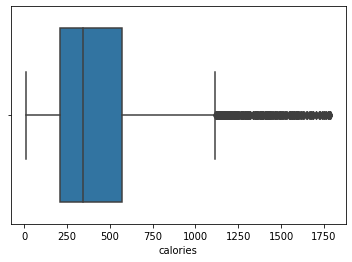

In [36]:
sns.boxplot(df_final["calories"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='calories', ylabel='Density'>

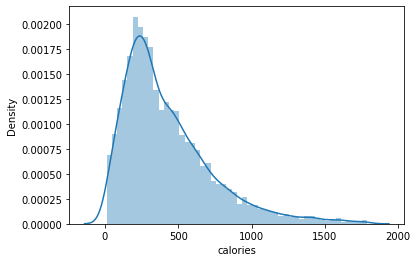

In [37]:
sns.distplot(df_final["calories"])